In [ ]:
import re
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000                   # to visualize 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

!pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.9 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project/Main_vediogames.csv',index_col='reviewTime',parse_dates=True)

In [ ]:
df.isnull().sum()

Unnamed: 0            0
overall               0
verified              0
reviewerID            0
asin                  0
reviewerName        219
reviewText          897
summary              39
unixReviewTime        0
title                51
brand             22988
main_cat           1332
Polarity              0
Analysis              0
dtype: int64

In [ ]:
df=df.drop('Unnamed: 0',axis=1)


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,title,brand,main_cat,Polarity,Analysis
reviewTime,,,,,,,,,,,,,
2014-06-09,1.0,True,A21ROB4YDOZA5P,0439381673,Mary M. Clark,used play game years ago loved it. found work ...,did not like this,1402272000,brand new learning company oregon trail th edi...,by learning company,video games,0.150000,Positive
2014-05-10,3.0,True,A3TNZ2Q5E7HTHD,0439381673,Sarabatya,game worked great story line videos would neve...,almost perfect,1399680000,brand new learning company oregon trail th edi...,by learning company,video games,0.210000,Positive
2014-02-07,4.0,True,A1OKRM3QFEATQO,0439381673,Amazon Customer,learn hard way ordering macbook pro work unles...,does not work with mac os unless it is 10.3 or...,1391731200,brand new learning company oregon trail th edi...,by learning company,video games,-0.038542,Negative
2014-02-07,1.0,True,A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,"product description state clearly. cd, box, pr...",does not work on mac osx,1391731200,brand new learning company oregon trail th edi...,by learning company,video games,-0.150000,Negative
2014-01-16,4.0,True,A19WLPIRHD15TH,0439381673,Karen Robinson,would recommend learning game anyone likes lea...,roughing it,1389830400,brand new learning company oregon trail th edi...,by learning company,video games,-0.200000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-02,5.0,True,A1YC7SW0LTVWE8,B01HJ14FDA,Codey,recently got jojo year. watched anime currentl...,if you like jojo you will definitely love this...,1501632000,jojo eyes of heaven complete bundle ps4 digita...,by bandai,video games,-0.070312,Negative
2017-05-29,5.0,True,ALE105H2A6QA4,B01HJ14FDA,Israel Valenzuela,love,five stars,1496016000,jojo eyes of heaven complete bundle ps4 digita...,by bandai,video games,0.500000,Positive
2017-03-09,5.0,False,A3VCTGLKL6QQ2J,B01HJ14FDA,Richard Salazar,fan jojo game must. still fan want solid compe...,great game for jojo fans,1489017600,jojo eyes of heaven complete bundle ps4 digita...,by bandai,video games,-0.200000,Negative


In [ ]:
overall = df[['overall']]
print(overall.head(2))

            overall
reviewTime         
2014-06-09      1.0
2014-05-10      3.0


<Axes: xlabel='reviewTime'>

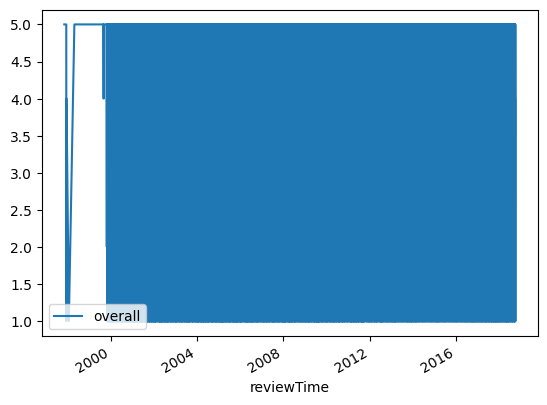

In [ ]:
overall.plot()

In [ ]:
df_data = overall.resample('M').mean()
df_data.head(2)

,overall
reviewTime,
1997-11-30,5.000000
1997-12-31,3.333333


In [ ]:
df_data.isnull().sum()

overall    16
dtype: int64

In [ ]:
df_data.dropna(inplace=True)

<Axes: xlabel='reviewTime'>

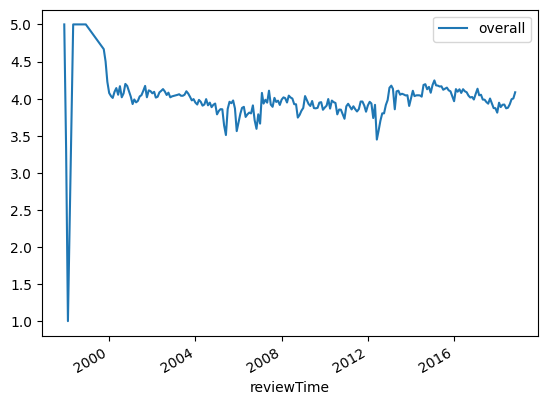

In [ ]:
df_data.plot()

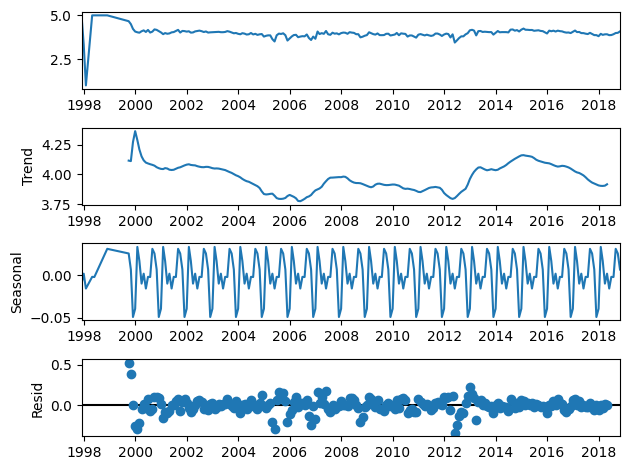

In [ ]:
df_data.sort_index(inplace=True)
ax = seasonal_decompose(df_data, model='additive',period=12)
ax.plot()
plt.show()

Moving average

In [ ]:
lags=3
moving_avg=df_data.rolling(window=lags).mean()


In [ ]:
print(moving_avg)

             overall
reviewTime          
1997-11-30       NaN
1997-12-31       NaN
1998-01-31  3.111111
1998-04-30  3.111111
1998-05-31  3.666667
...              ...
2018-06-30  3.888209
2018-07-31  3.889227
2018-08-31  3.930141
2018-09-30  3.972145
2018-10-31  4.026273

[236 rows x 1 columns]


In [ ]:
df_ts = pd.DataFrame({'actual':df_data['overall'], 'ma':moving_avg['overall']})
print(df_ts)

              actual        ma
reviewTime                    
1997-11-30  5.000000       NaN
1997-12-31  3.333333       NaN
1998-01-31  1.000000  3.111111
1998-04-30  5.000000  3.111111
1998-05-31  5.000000  3.666667
...              ...       ...
2018-06-30  3.876028  3.888209
2018-07-31  3.922724  3.889227
2018-08-31  3.991670  3.930141
2018-09-30  4.002042  3.972145
2018-10-31  4.085106  4.026273

[236 rows x 2 columns]


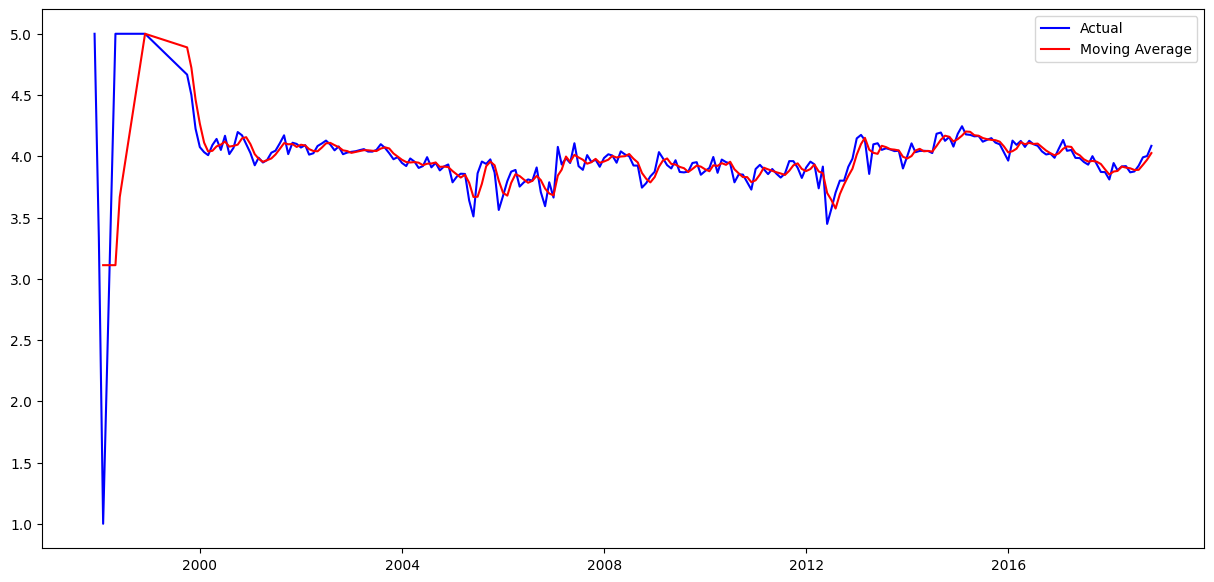

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_ts.actual, color='blue',label = 'Actual')
plt.plot(df_ts.ma, color='red', label = 'Moving Average')

plt.legend()
plt.show()

Exponential smoothing

In [ ]:
data=df_data['overall']
data.head()

reviewTime
1997-11-30    5.000000
1997-12-31    3.333333
1998-01-31    1.000000
1998-04-30    5.000000
1998-05-31    5.000000
Name: overall, dtype: float64

In [ ]:
def simplesmoothing(data,alpha):
    model1=SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    pred=model1.fittedvalues  #forcating values
    
    df1=pd.DataFrame({'actual':data, 'forecast':pred})
    return(model1,df1)

In [ ]:
df1=simplesmoothing(data,0.5)
df1

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x7f78d0ea59a0>,
               actual  forecast
 reviewTime                    
 1997-11-30  5.000000  4.075427
 1997-12-31  3.333333  4.537714
 1998-01-31  1.000000  3.935523
 1998-04-30  5.000000  2.467762
 1998-05-31  5.000000  3.733881
 ...              ...       ...
 2018-06-30  3.876028  3.890518
 2018-07-31  3.922724  3.883273
 2018-08-31  3.991670  3.902999
 2018-09-30  4.002042  3.947334
 2018-10-31  4.085106  3.974688
 
 [236 rows x 2 columns])

In [ ]:
simple_exp = {}
alphas = [0.2, 0.5, 0.7,0.9]
models=[]

for a in alphas:
    m, df1 = simplesmoothing(data,a)
    simple_exp[a] = df1.forecast
    models.append(m)
    

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


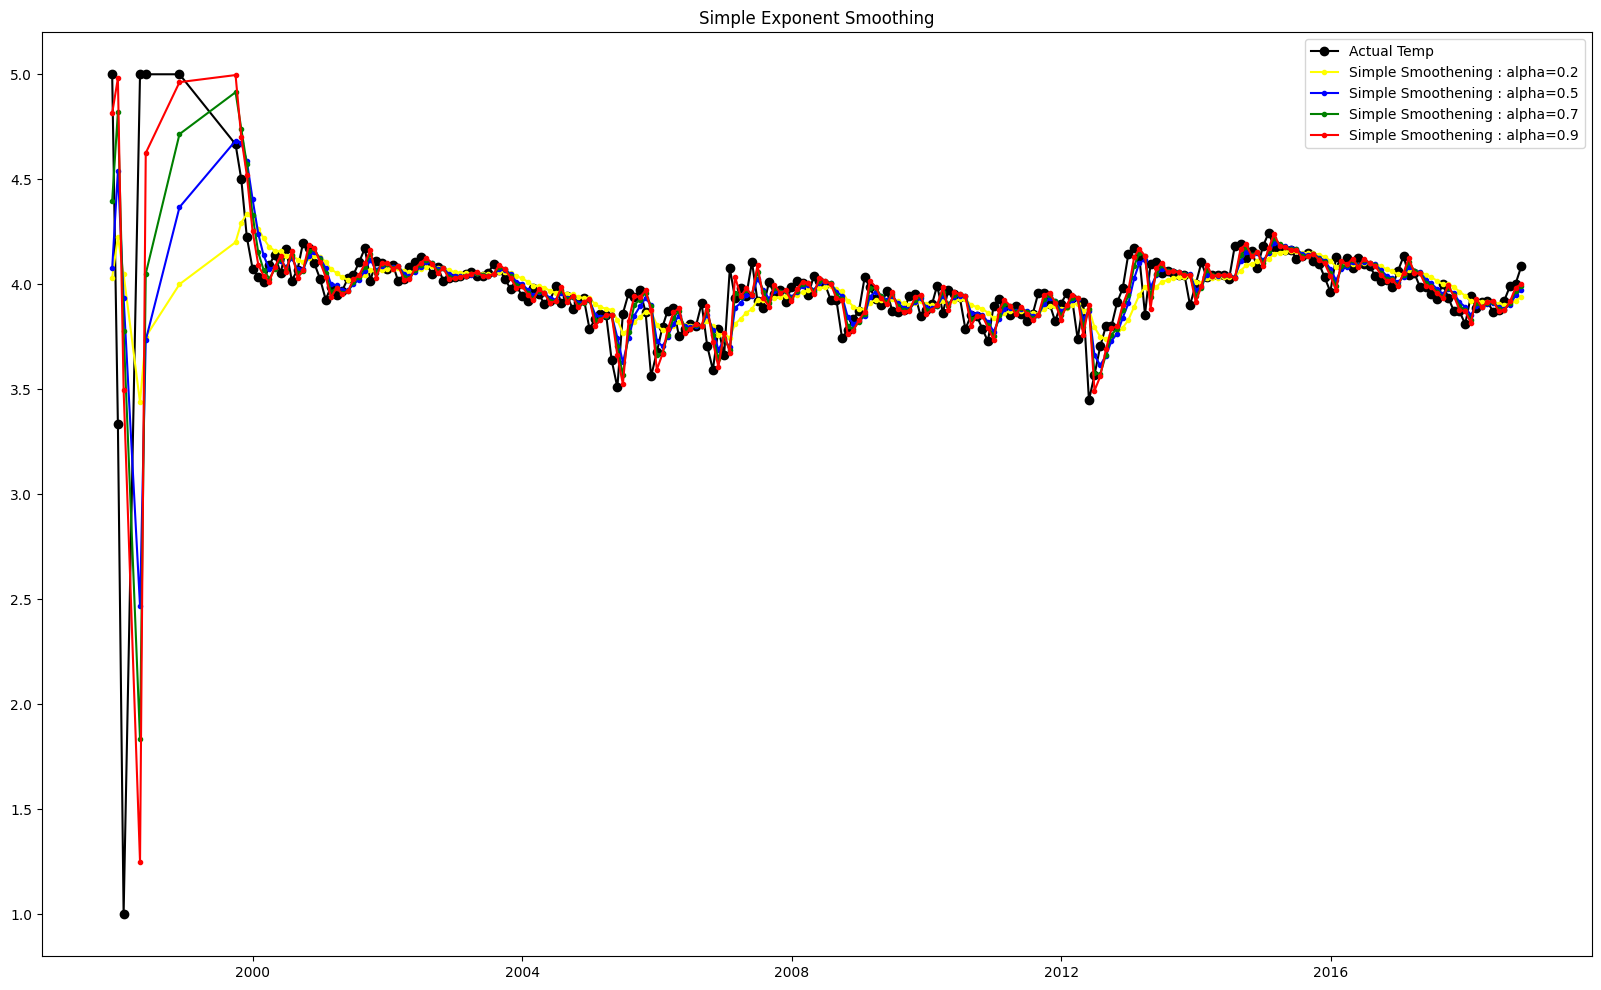

In [ ]:
colors = ['yellow','blue','green','red']

fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker='o', color='black',label='Actual Temp')

for i in range(len(alphas)):
    plt.plot(simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

Double exponential smoothing

In [ ]:
alpha=0.2;beta=0.3

In [ ]:
model2=ExponentialSmoothing(df_data,trend='additive').fit(smoothing_level=alpha,smoothing_trend=beta)
d_exp=model2.fittedvalues
print(d_exp)

reviewTime
1997-11-30    4.010863
1997-12-31    4.345060
1998-01-31    4.218381
1998-04-30    3.457269
1998-05-31    3.740942
                ...   
2018-06-30    3.848823
2018-07-31    3.849973
2018-08-31    3.864598
2018-09-30    3.897711
2018-10-31    3.932536
Length: 236, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Double Exponent Smoothing')

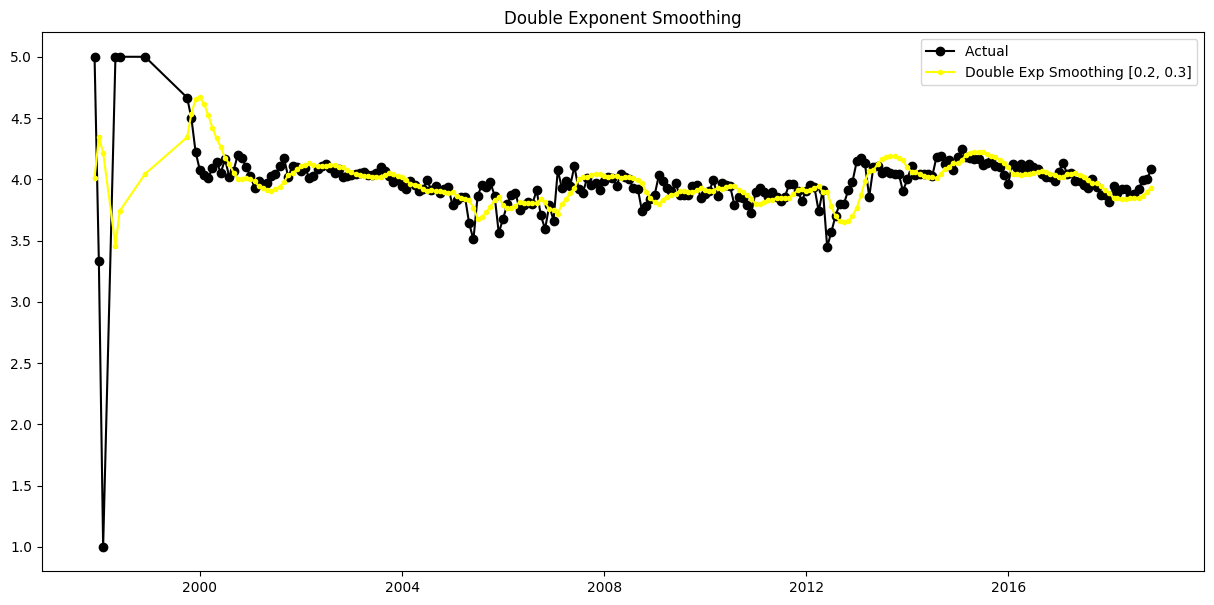

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df_data,marker='o',color='black',label='Actual ')
plt.plot(d_exp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.3]')
plt.legend()
plt.title('Double Exponent Smoothing')

Triple Exponent Smoothing

In [ ]:
alpha=0.40 ;beta=0.50 ;gamma=0.25

model3=ExponentialSmoothing(df_data.overall,trend='add',seasonal='add',seasonal_periods=12).fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)

pred_model3=model3.fittedvalues

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Triple Exponent Smoothing')

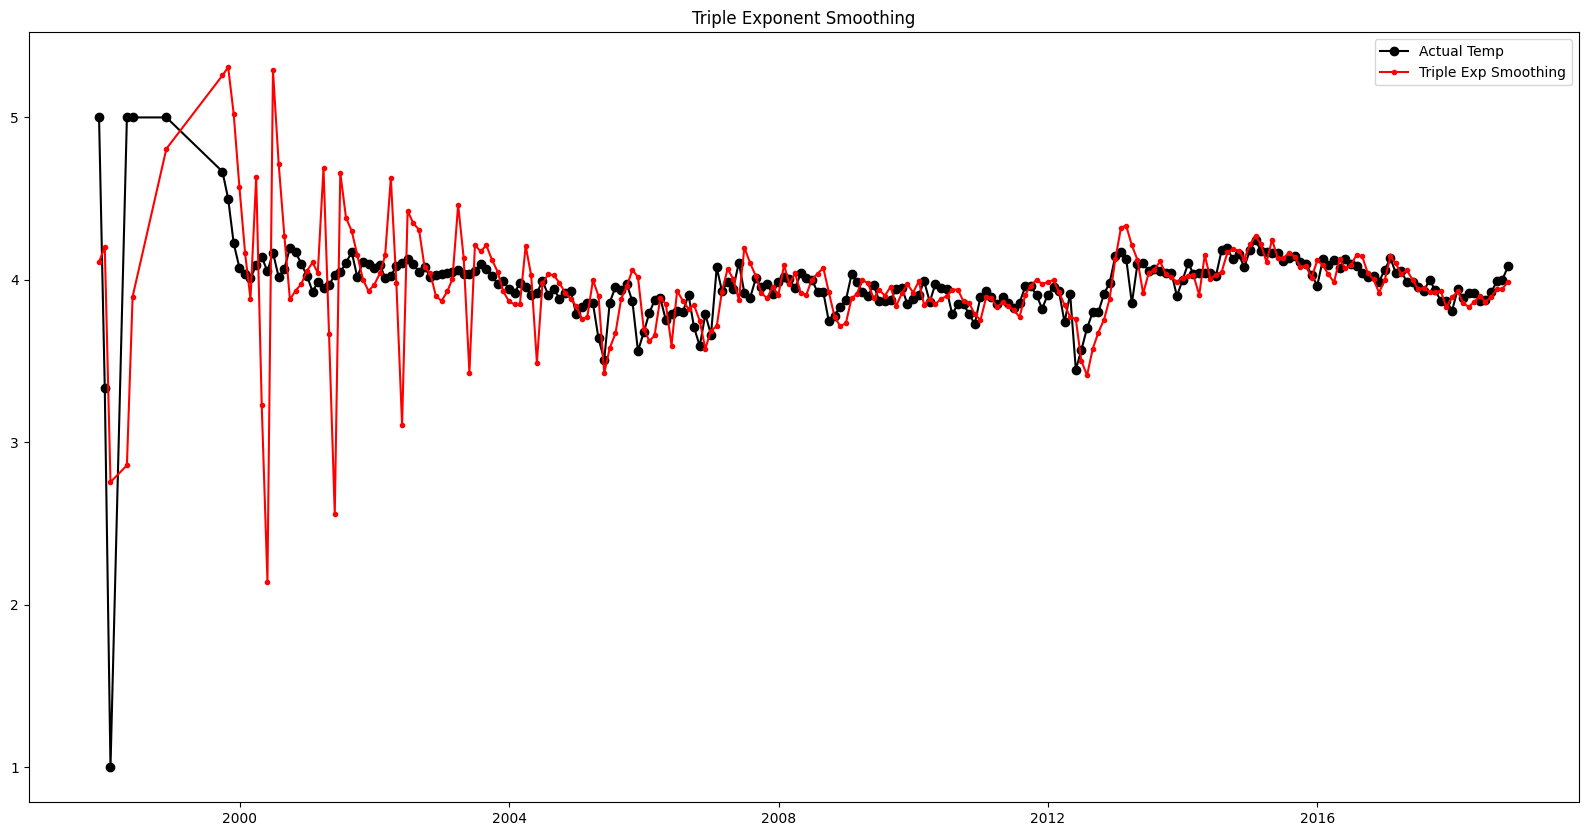

In [ ]:
ax = plt.subplots(figsize = (20,10))
plt.plot(df_data.overall, marker='o',color='black',label='Actual Temp')
plt.plot(model3.fittedvalues,marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()

plt.title('Triple Exponent Smoothing')

In [ ]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [ ]:
stcheck=checkStationarity(df_data); 
stcheck

'p-value=7.48608439314592e-20. Data is stationary'

### PLOT ACF and PACF

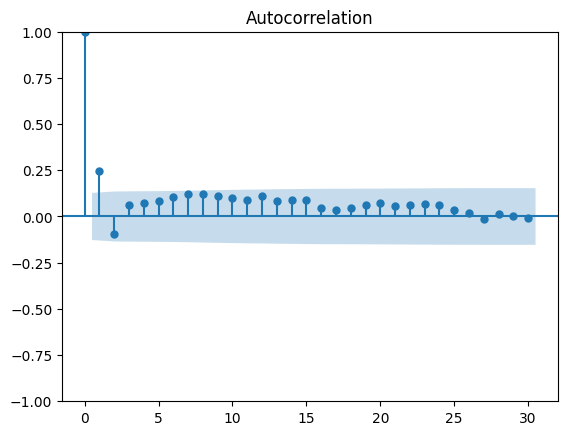

In [ ]:
plot_acf(df_data['overall'],lags=30);

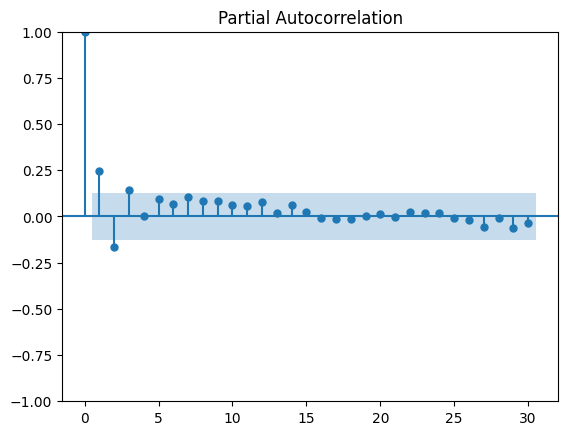

In [ ]:
plot_pacf(df_data['overall'],lags=30);

## TO SELECT p,d,q Value -> ARIMA used.

HYPERPARAMETER TUNNING (P,D,Q)lag/s -> SEASONAL COMPONENTS

P = 0
Q = 0
D = 0
HYPERPARAMETER TUNNING (p,d,q) -> NON SEASONAL COMPONENTS

INTERPRETATION:
    
    p value : 4 -> PACF
    q value : 3-> ACF
    d value : differencing done. d=0

In [ ]:
for i in range(1,5):
  for j in range (1,4):
    model= ARIMA(df_data,order=(i,0,j))
    r1=model.fit()
    print(r1.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  236
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -20.296
Date:                Tue, 04 Apr 2023   AIC                             48.591
Time:                        04:52:00   BIC                             62.447
Sample:                             0   HQIC                            54.176
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9772      0.033    119.763      0.000       3.912       4.042
ar.L1         -0.2856      0.044     -6.472      0.000      -0.372      -0.199
ma.L1          0.6086      0.051     11.956      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  236
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -20.189
Date:                Tue, 04 Apr 2023   AIC                             50.377
Time:                        04:52:01   BIC                             67.697
Sample:                             0   HQIC                            57.359
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9772      0.033    119.623      0.000       3.912       4.042
ar.L1         -0.0719      0.665     -0.108      0.914      -1.375       1.231
ma.L1          0.3918      0.677      0.579      0.5

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  236
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 -15.494
Date:                Tue, 04 Apr 2023   AIC                             42.988
Time:                        04:52:02   BIC                             63.771
Sample:                             0   HQIC                            51.366
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9820      0.041     96.428      0.000       3.901       4.063
ar.L1          0.9614      0.090     10.664      0.000       0.785       1.138
ma.L1         -0.7042      0.133     -5.288      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  236
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -20.085
Date:                Tue, 04 Apr 2023   AIC                             50.171
Time:                        04:52:03   BIC                             67.490
Sample:                             0   HQIC                            57.152
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9773      0.034    118.498      0.000       3.911       4.043
ar.L1         -0.1059      0.213     -0.497      0.619      -0.524       0.312
ar.L2         -0.0853      0.112     -0.762      0.4

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  236
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -17.466
Date:                Tue, 04 Apr 2023   AIC                             46.933
Time:                        04:52:03   BIC                             67.716
Sample:                             0   HQIC                            55.310
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9836      0.041     97.071      0.000       3.903       4.064
ar.L1          0.5544      0.177      3.141      0.002       0.208       0.900
ar.L2          0.3975      0.084      4.705      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-pa

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  236
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 -12.538
Date:                Tue, 04 Apr 2023   AIC                             39.075
Time:                        04:52:04   BIC                             63.322
Sample:                             0   HQIC                            48.850
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9928      0.040     99.708      0.000       3.914       4.071
ar.L1          1.5308      0.098     15.696      0.000       1.340       1.722
ar.L2         -0.5618      0.107     -5.272      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-pa

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  236
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 -11.772
Date:                Tue, 04 Apr 2023   AIC                             37.544
Time:                        04:52:06   BIC                             61.791
Sample:                             0   HQIC                            47.318
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9919      0.051     78.387      0.000       3.892       4.092
ar.L1          1.8295      0.101     18.098      0.000       1.631       2.028
ar.L2         -1.2989      0.118    -10.976      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  236
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 -14.515
Date:                Tue, 04 Apr 2023   AIC                             45.030
Time:                        04:52:06   BIC                             72.741
Sample:                             0   HQIC                            56.200
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9824      0.052     76.338      0.000       3.880       4.085
ar.L1          1.1350      0.129      8.800      0.000       0.882       1.388
ar.L2         -0.6318      0.120     -5.272      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-pa

                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  236
Model:                 ARIMA(4, 0, 2)   Log Likelihood                 -13.007
Date:                Tue, 04 Apr 2023   AIC                             42.013
Time:                        04:52:08   BIC                             69.724
Sample:                             0   HQIC                            53.184
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9861      0.046     86.278      0.000       3.896       4.077
ar.L1          0.5196      0.114      4.573      0.000       0.297       0.742
ar.L2          0.2514      0.128      1.962      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
m1 = auto_arima(df_data['overall'],start_p=1,max_p=5,d=0 ,start_q=1,max_q=4, seasonal=True, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=48.592, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=69.983, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=56.230, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=48.956, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1324.494, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=50.171, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=52.935, Time=0.56 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=48.400, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=50.303, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=46.024, Time=0.72 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=47.541, Time=1.50 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=38.139, Time=1.95 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=48.560, Time=1.16 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=39.217, Time=1.34 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=45.165, Time=0.50

In [ ]:
p=3;d=0;q=2
P=0;D=0;Q=0

model2=sm.tsa.statespace.SARIMAX(df_data['overall'],order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
print(model2.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  236
Model:               SARIMAX(3, 0, 2)   Log Likelihood                 -17.707
Date:                Tue, 04 Apr 2023   AIC                             47.413
Time:                        05:07:59   BIC                             68.196
Sample:                             0   HQIC                            55.791
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8730      0.119     15.717      0.000       1.639       2.107
ar.L2         -1.3300      0.159     -8.376      0.000      -1.641      -1.019
ar.L3          0.4570      0.050      9.111      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
len(df_data)

236

In [ ]:
xtrain,xtest=train_test_split(df_data,test_size=0.2)

In [ ]:
len(xtrain)

188

In [ ]:
len(xtest)

48

In [ ]:

final = sm.tsa.statespace.SARIMAX(xtrain['overall'],order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
print(final.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                overall   No. Observations:                  188
Model:               SARIMAX(3, 0, 2)   Log Likelihood                  22.757
Date:                Tue, 04 Apr 2023   AIC                            -33.513
Time:                        05:08:26   BIC                            -14.095
Sample:                             0   HQIC                           -25.646
                                - 188                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0521      0.298     -0.175      0.861      -0.635       0.531
ar.L2          0.9990      0.274      3.645      0.000       0.462       1.536
ar.L3          0.0531      0.093      0.572      0.5

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions = final.predict(0,len(xtest)-1)
print(predictions)

reviewTime
2000-01-31    0.000000
2004-01-31    4.016158
2002-08-31    3.971651
2012-05-31    3.991471
2007-02-28    3.883496
2004-03-31    3.868527
2001-05-31    3.881451
2011-12-31    3.899786
2016-02-29    3.906450
2018-04-30    3.918587
2006-08-31    3.926963
2016-12-31    3.926790
2006-01-31    3.929327
2016-05-31    3.933775
2007-12-31    3.929849
1999-10-31    3.941665
2011-05-31    3.950112
2014-01-31    3.978529
2010-06-30    3.972841
1999-11-30    3.979552
2012-10-31    3.977711
2007-01-31    3.990507
2001-09-30    3.986644
2002-11-30    3.990527
2002-12-31    3.992295
2002-03-31    3.993167
2018-10-31    3.995761
2001-06-30    3.995480
2005-12-31    4.000143
2005-08-31    4.006766
2012-04-30    3.991311
2011-02-28    3.988851
2006-03-31    3.987621
2011-06-30    3.983686
2012-01-31    3.982678
2013-08-31    3.974087
2003-06-30    3.972265
2007-08-31    3.974023
2006-12-31    3.978212
2009-06-30    3.986214
2013-10-31    3.972890
2018-01-31    3.964728
2009-01-31    3.970482


In [ ]:
test_s = xtest.squeeze()
actual = []; pred = []

for i in range(len(predictions)):
  actual.append(test_s[i])
  pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

      actual  predicted       err
0   3.876028   0.000000  3.876028
1   4.038514   4.016158  0.022357
2   4.016299   3.971651  0.044648
3   3.991670   3.991471  0.000199
4   1.000000   3.883496 -2.883496
5   4.106419   3.868527  0.237892
6   3.833941   3.881451 -0.047511
7   4.666667   3.899786  0.766881
8   3.994147   3.906450  0.087697
9   3.860798   3.918587 -0.057788
10  3.889263   3.926963 -0.037700
11  3.973236   3.926790  0.046446
12  3.823232   3.929327 -0.106094
13  3.787397   3.933775 -0.146378
14  4.100708   3.929849  0.170860
15  4.013528   3.941665  0.071864
16  3.728095   3.950112 -0.222017
17  3.744043   3.978529 -0.234486
18  3.905047   3.972841 -0.067795
19  3.787879   3.979552 -0.191674
20  3.972207   3.977711 -0.005504
21  4.085352   3.990507  0.094845
22  4.134066   3.986644  0.147422
23  4.157549   3.990527  0.167023
24  4.040000   3.992295  0.047705
25  4.039733   3.993167  0.046565
26  3.985135   3.995761 -0.010626
27  4.017654   3.995480  0.022175
28  3.858557  

<Axes: >

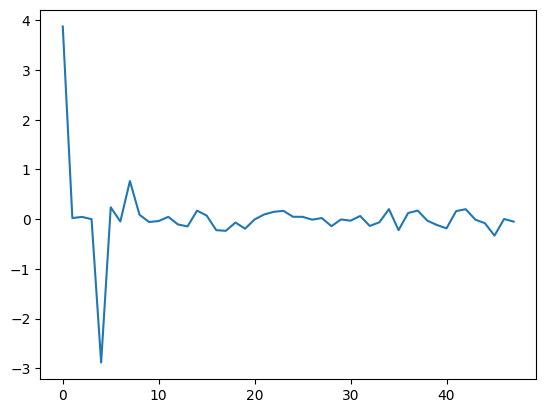

In [ ]:
df_res.err.plot()

<Axes: >

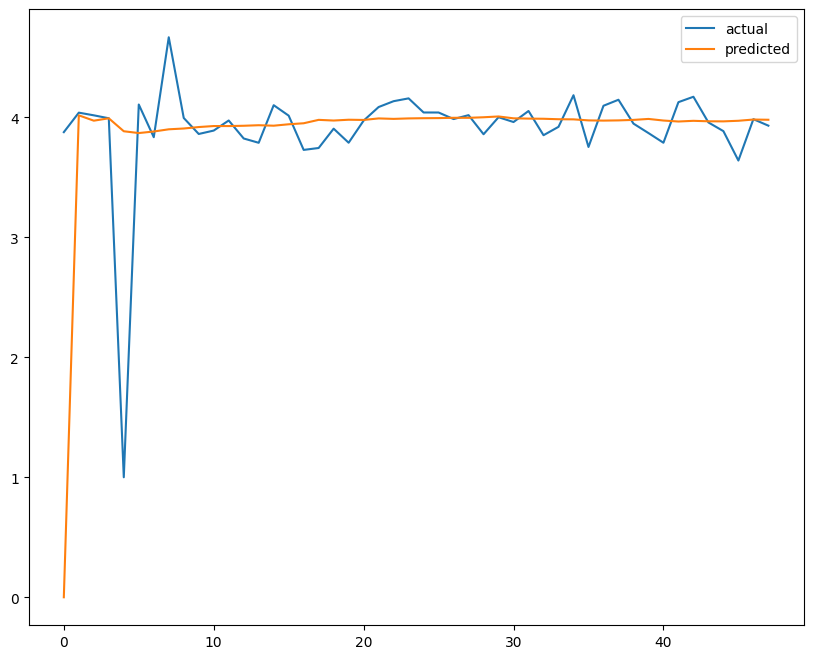

In [ ]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)

In [ ]:
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print("\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))


	MSE = 0.5144802849966529
	RMSE = 0.7172728107189432


In [ ]:
final = sm.tsa.statespace.SARIMAX(df_data,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
fcast = final.predict(start=len(xtrain), end=len(xtrain)+47).rename('Forecast')

print(fcast)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


reviewTime
2014-11-30    4.054802
2014-12-31    4.037179
2015-01-31    4.101571
2015-02-28    4.119965
2015-03-31    4.087974
2015-04-30    4.104375
2015-05-31    4.116702
2015-06-30    4.133646
2015-07-31    4.128567
2015-08-31    4.151215
2015-09-30    4.161438
2015-10-31    4.147513
2015-11-30    4.148428
2015-12-31    4.129047
2016-01-31    4.116674
2016-02-29    4.186313
2016-03-31    4.136962
2016-04-30    4.131426
2016-05-31    4.095927
2016-06-30    4.113144
2016-07-31    4.091708
2016-08-31    4.087390
2016-09-30    4.074865
2016-10-31    4.077020
2016-11-30    4.087661
2016-12-31    4.074287
2017-01-31    4.101830
2017-02-28    4.105417
2017-03-31    4.046717
2017-04-30    4.054305
2017-05-31    4.032912
2017-06-30    4.045775
2017-07-31    4.038914
2017-08-31    4.035613
2017-09-30    4.060283
2017-10-31    4.016721
2017-11-30    3.991895
2017-12-31    3.997717
2018-01-31    3.971776
2018-02-28    4.018949
2018-03-31    3.960018
2018-04-30    3.957371
2018-05-31    3.939460


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='reviewTime'>

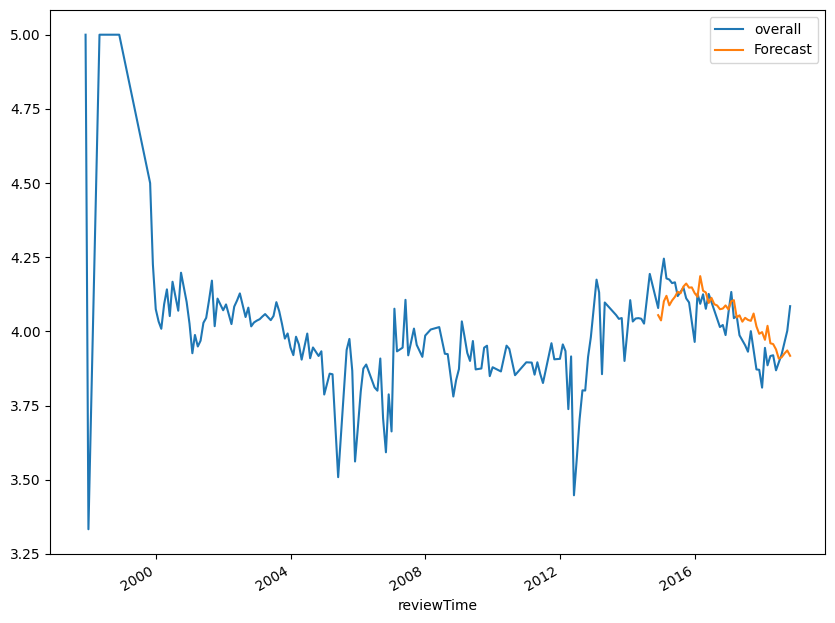

In [ ]:
xtrain.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)